In [2]:
#Only do this if you're using rar extension and zipping and uploading the files.


# Step 1: Install the necessary libraries
!pip install rarfile
!apt-get install unrar

# Step 2: Upload the RAR file
from google.colab import files
uploaded = files.upload()

# Step 3: Extract the RAR file
import rarfile
import os

# Get the name of the uploaded file
rar_file_name = list(uploaded.keys())[0]

# Create a directory to extract the files
extract_path = '/content/NEU_Metal_Surface_Defects_Data'
os.makedirs(extract_path, exist_ok=True)

# Open and extract the RAR file
with rarfile.RarFile(rar_file_name) as rf:
    rf.extractall(extract_path)

# Verify the contents of the folder
print("Contents of the folder:")
print(os.listdir(extract_path))


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


Saving NEU_Metal_Surface_Defects_Data.rar to NEU_Metal_Surface_Defects_Data.rar
Contents of the folder:
['NEU Metal Surface Defects Data']


In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array


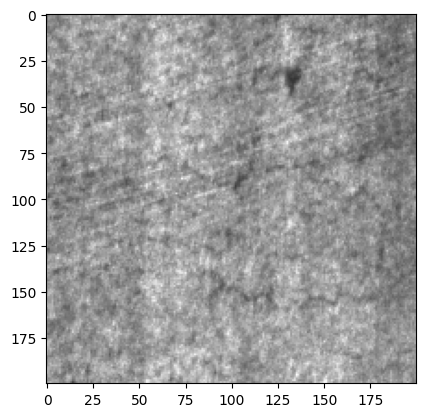

In [4]:
img = image.load_img("/content/NEU_Metal_Surface_Defects_Data/NEU Metal Surface Defects Data/train/Crazing/Cr_122.bmp")
plt.imshow(img)

array([[[124, 124, 124],
        [128, 128, 128],
        [139, 139, 139],
        ...,
        [107, 107, 107],
        [126, 126, 126],
        [131, 131, 131]],

       [[120, 120, 120],
        [139, 139, 139],
        [148, 148, 148],
        ...,
        [118, 118, 118],
        [130, 130, 130],
        [142, 142, 142]],

       [[117, 117, 117],
        [158, 158, 158],
        [151, 151, 151],
        ...,
        [120, 120, 120],
        [118, 118, 118],
        [130, 130, 130]],

       ...,

       [[152, 152, 152],
        [137, 137, 137],
        [149, 149, 149],
        ...,
        [151, 151, 151],
        [124, 124, 124],
        [144, 144, 144]],

       [[137, 137, 137],
        [145, 145, 145],
        [150, 150, 150],
        ...,
        [151, 151, 151],
        [122, 122, 122],
        [135, 135, 135]],

       [[154, 154, 154],
        [174, 174, 174],
        [186, 186, 186],
        ...,
        [141, 141, 141],
        [122, 122, 122],
        [130, 130, 130]]], dtype=uint8)
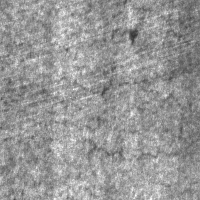

In [5]:
cv2.imread("/content/NEU_Metal_Surface_Defects_Data/NEU Metal Surface Defects Data/train/Crazing/Cr_122.bmp")

In [6]:
cv2.imread("/content/NEU_Metal_Surface_Defects_Data/NEU Metal Surface Defects Data/train/Crazing/Cr_122.bmp").shape

(200, 200, 3)

In [7]:
#This was just a personal check to see if the images were truly grayscale
# Load the image
image = cv2.imread('/content/NEU_Metal_Surface_Defects_Data/NEU Metal Surface Defects Data/train/Crazing/Cr_122.bmp')

# Check if the image has three channels
if image.shape[2] == 3:
    # Check if all channels are identical (grayscale)
    if (image[:,:,0] == image[:,:,1]).all() and (image[:,:,1] == image[:,:,2]).all():
        print("The image appears to be grayscale in RGB format.")
    else:
        print("The image has three channels (RGB).")
else:
    print("The image does not have three channels (not RGB).")


The image appears to be grayscale in RGB format.


In [8]:
train = ImageDataGenerator(rescale = 1./200) #Assumed that the highest pixel value was 200.
validation = ImageDataGenerator(rescale = 1./200)

In [9]:
train_dataset = train.flow_from_directory("/content/NEU_Metal_Surface_Defects_Data/NEU Metal Surface Defects Data/train",
                                          target_size = (200,200),
                                          batch_size = 32,
                                          class_mode = "categorical")
validation_dataset = validation.flow_from_directory("/content/NEU_Metal_Surface_Defects_Data/NEU Metal Surface Defects Data/valid",
                                        target_size = (200,200),
                                        batch_size = 32,
                                        class_mode = "categorical")

Found 2481 images belonging to 6 classes.
Found 72 images belonging to 6 classes.


In [10]:
train_dataset.class_indices

{'Crazing': 0,
 'Inclusion': 1,
 'Patches': 2,
 'Pitted': 3,
 'Rolled': 4,
 'Scratches': 5}

In [11]:
model = Sequential([

    #First layer of Convolution and Max Pooling
    Conv2D(32, (3,3), activation = "ReLU", input_shape =(200,200,3)),
    MaxPooling2D((2,2)),


    #Second Layer of Convolution and max Pooling
    Conv2D(32,(3,3), activation = "ReLU"),
    MaxPooling2D((2,2)),

    #Now I'm flattening the nodes into a single vector, to input
    Flatten(),
    # Dropout(0.5),
    Dense(64, activation= "ReLU"),
    Dense(6, activation = "softmax")


 ])

In [12]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

# CategoricalCrossentropy class

# keras.losses.CategoricalCrossentropy(
#     from_logits=False,
#     label_smoothing=0.0,
#     axis=-1,
#     reduction="sum_over_batch_size",
#     name="categorical_crossentropy",
# )

# Computes the crossentropy loss between the labels and predictions.

# Use this crossentropy loss function when there are two or more label classes. We expect labels to be provided in a one_hot representation. If you want to provide labels as integers, please use SparseCategoricalCrossentropy loss. There should be num_classes floating point values per feature, i.e., the shape of both y_pred and y_true are [batch_size, num_classes].

# Arguments

#     from_logits: Whether y_pred is expected to be a logits tensor. By default, we assume that y_pred encodes a probability distribution.
#     label_smoothing: Float in [0, 1]. When > 0, label values are smoothed, meaning the confidence on label values are relaxed. For example, if 0.1, use 0.1 / num_classes for non-target labels and 0.9 + 0.1 / num_classes for target labels.
#     axis: The axis along which to compute crossentropy (the features axis). Defaults to -1.
#     reduction: Type of reduction to apply to the loss. In almost all cases this should be "sum_over_batch_size". Supported options are "sum", "sum_over_batch_size" or None.
#     name: Optional name for the loss instance.


In [13]:
model_fit = model.fit(train_dataset, validation_data = validation_dataset, epochs = 10)

Epoch 1/10
78/78 [==============================] - 143s 2s/step - loss: 1.8034 - accuracy: 0.3825 - val_loss: 1.3995 - val_accuracy: 0.4306
Epoch 2/10
78/78 [==============================] - 136s 2s/step - loss: 1.3120 - accuracy: 0.5337 - val_loss: 1.2673 - val_accuracy: 0.5000
Epoch 3/10
78/78 [==============================] - 135s 2s/step - loss: 1.0454 - accuracy: 0.6562 - val_loss: 0.9699 - val_accuracy: 0.5972
Epoch 4/10
78/78 [==============================] - 133s 2s/step - loss: 0.9331 - accuracy: 0.6437 - val_loss: 0.8765 - val_accuracy: 0.7639
Epoch 5/10
78/78 [==============================] - 128s 2s/step - loss: 0.6272 - accuracy: 0.7686 - val_loss: 0.5650 - val_accuracy: 0.8194
Epoch 6/10
78/78 [==============================] - 140s 2s/step - loss: 0.4931 - accuracy: 0.8255 - val_loss: 0.3073 - val_accuracy: 0.8889
Epoch 7/10
78/78 [==============================] - 130s 2s/step - loss: 0.5335 - accuracy: 0.8138 - val_loss: 0.2383 - val_accuracy: 0.9167
Epoch 8/10
78

In [14]:
defect_dict = {0: "Crazing", 1: "Inclusion", 2: "Patches", 3: "Pitted", 4: "Rolled", 5: "Scratches"}

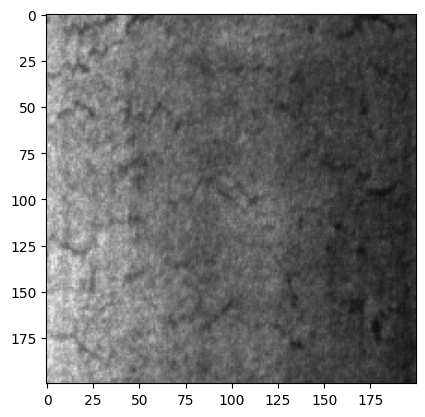

1/1 [==============================] - 0s 39ms/step
[[1. 0. 0. 0. 0. 0.]]
It's Crazing


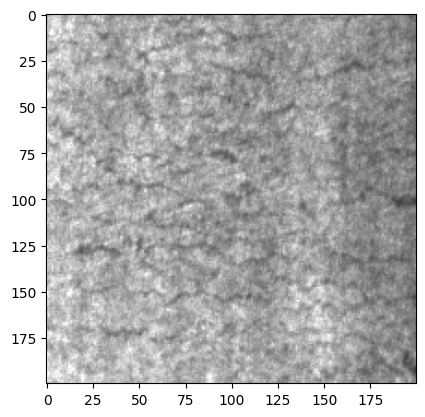

1/1 [==============================] - 0s 39ms/step
[[1. 0. 0. 0. 0. 0.]]
It's Crazing


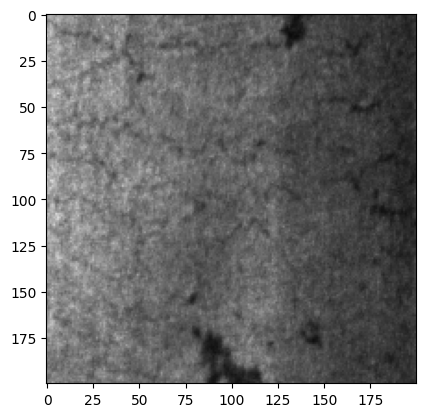

1/1 [==============================] - 0s 36ms/step
[[1. 0. 0. 0. 0. 0.]]
It's Crazing


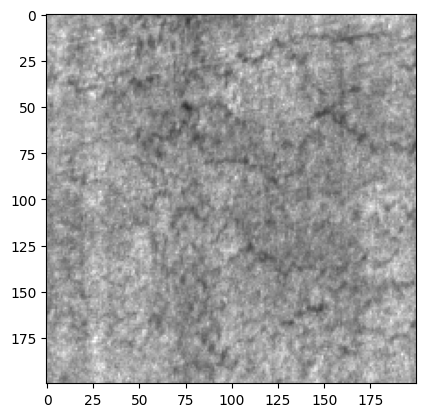

1/1 [==============================] - 0s 43ms/step
[[1. 0. 0. 0. 0. 0.]]
It's Crazing


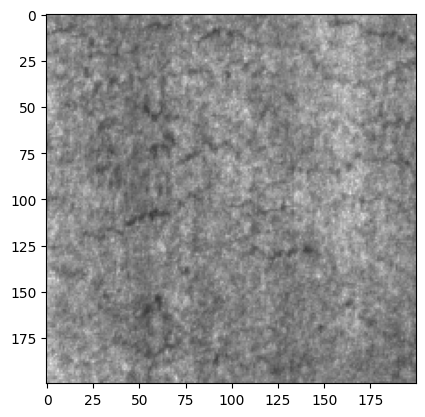

1/1 [==============================] - 0s 35ms/step
[[1. 0. 0. 0. 0. 0.]]
It's Crazing


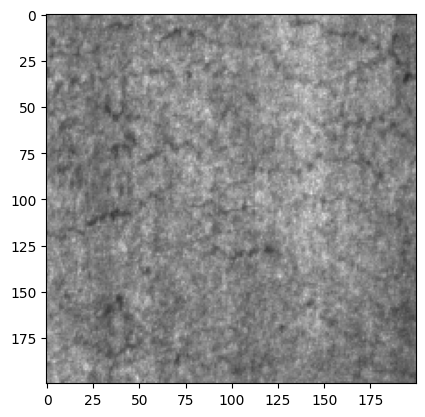

1/1 [==============================] - 0s 57ms/step
[[1. 0. 0. 0. 0. 0.]]
It's Crazing


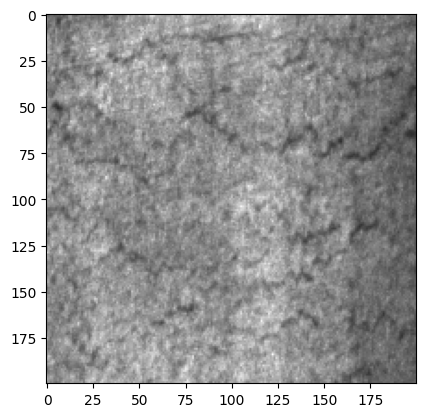

1/1 [==============================] - 0s 63ms/step
[[1. 0. 0. 0. 0. 0.]]
It's Crazing


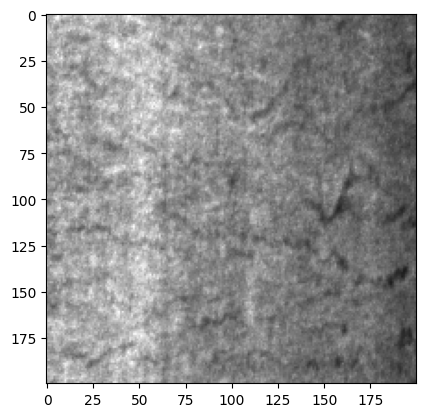

1/1 [==============================] - 0s 63ms/step
[[1. 0. 0. 0. 0. 0.]]
It's Crazing


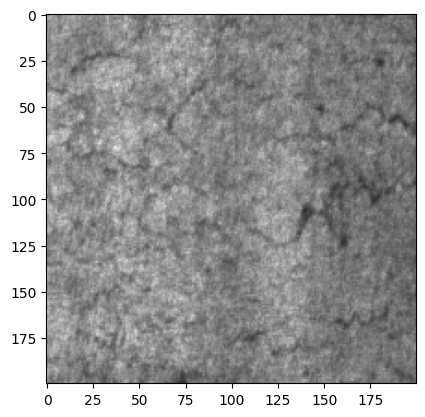

1/1 [==============================] - 0s 61ms/step
[[1. 0. 0. 0. 0. 0.]]
It's Crazing


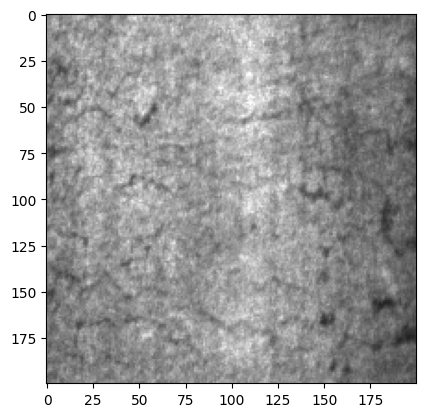

1/1 [==============================] - 0s 95ms/step
[[1. 0. 0. 0. 0. 0.]]
It's Crazing


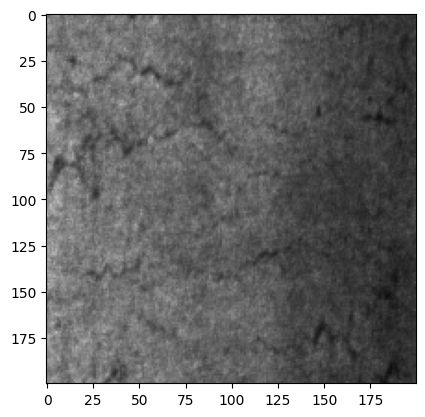

1/1 [==============================] - 0s 103ms/step
[[1. 0. 0. 0. 0. 0.]]
It's Crazing


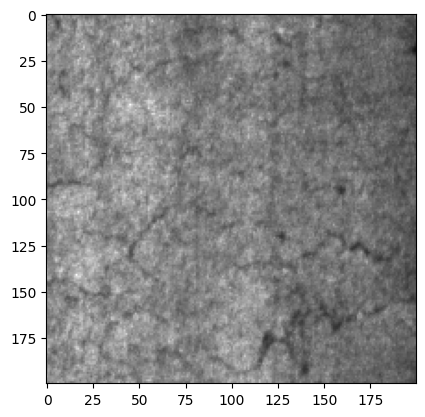

1/1 [==============================] - 0s 57ms/step
[[1. 0. 0. 0. 0. 0.]]
It's Crazing


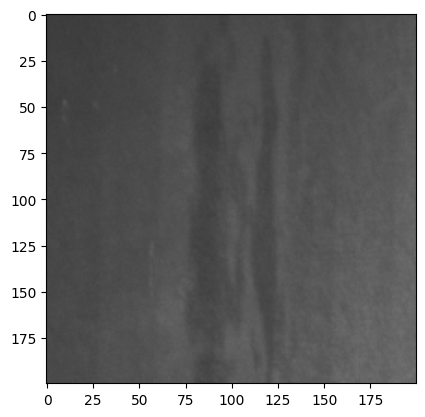

1/1 [==============================] - 0s 57ms/step
[[0. 0. 0. 1. 0. 0.]]
It's not Inclusion


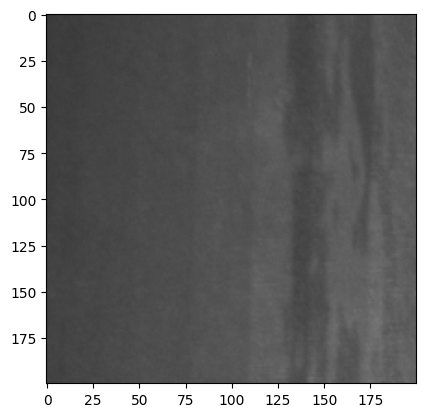

1/1 [==============================] - 0s 61ms/step
[[0. 0. 0. 1. 0. 0.]]
It's not Inclusion


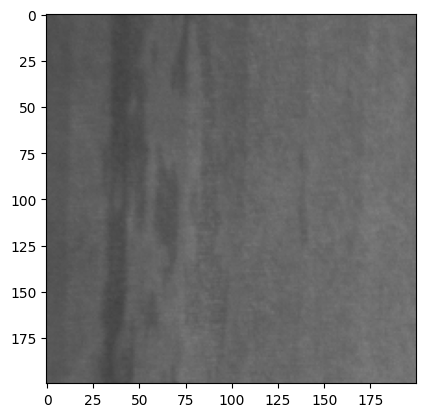

1/1 [==============================] - 0s 34ms/step
[[0. 0. 0. 1. 0. 0.]]
It's not Inclusion


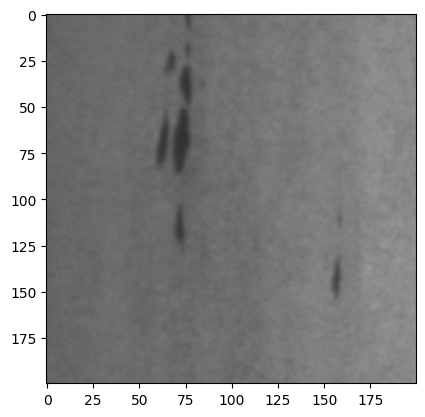

1/1 [==============================] - 0s 33ms/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 6.3759313e-25
  0.0000000e+00]]
It's not Inclusion


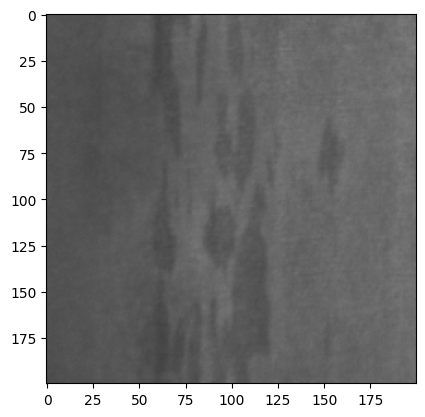

1/1 [==============================] - 0s 35ms/step
[[0. 0. 0. 1. 0. 0.]]
It's not Inclusion


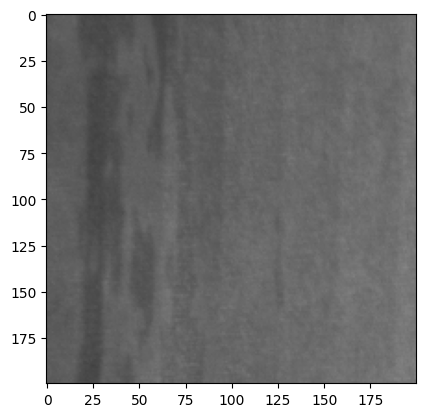

1/1 [==============================] - 0s 42ms/step
[[0. 0. 0. 1. 0. 0.]]
It's not Inclusion


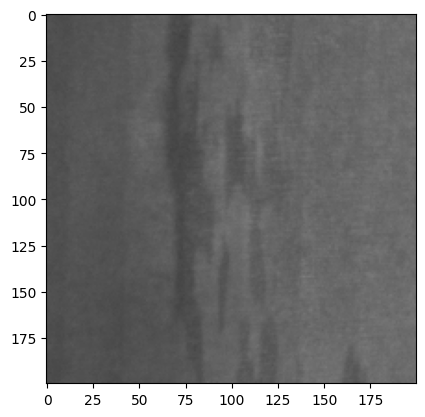

1/1 [==============================] - 0s 34ms/step
[[0. 0. 0. 1. 0. 0.]]
It's not Inclusion


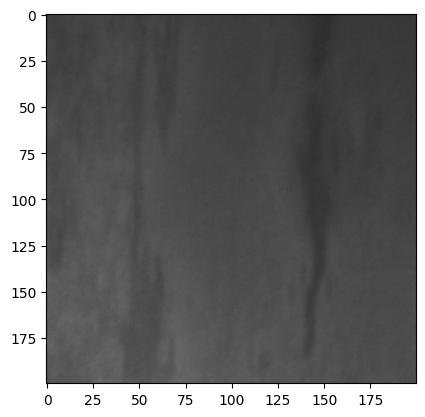

1/1 [==============================] - 0s 32ms/step
[[0. 0. 0. 1. 0. 0.]]
It's not Inclusion


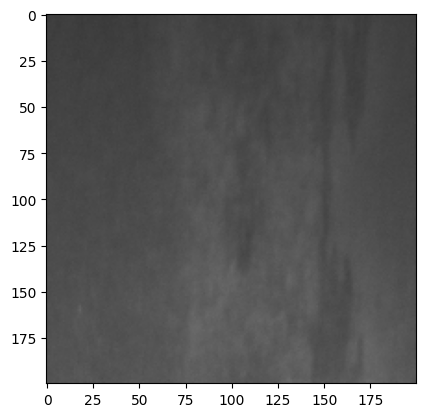

1/1 [==============================] - 0s 55ms/step
[[0. 0. 0. 1. 0. 0.]]
It's not Inclusion


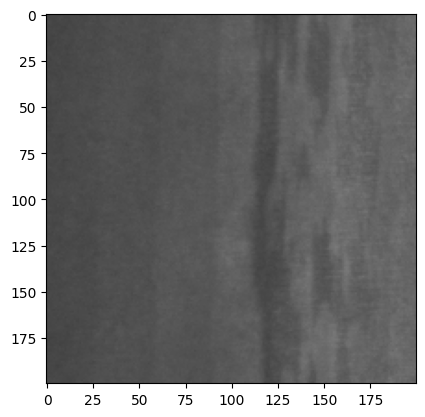

1/1 [==============================] - 0s 36ms/step
[[0. 0. 0. 1. 0. 0.]]
It's not Inclusion


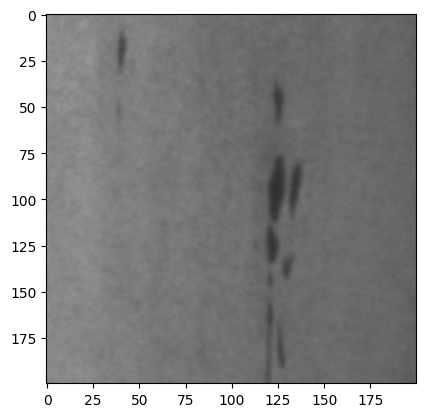

1/1 [==============================] - 0s 32ms/step
[[0. 0. 0. 1. 0. 0.]]
It's not Inclusion


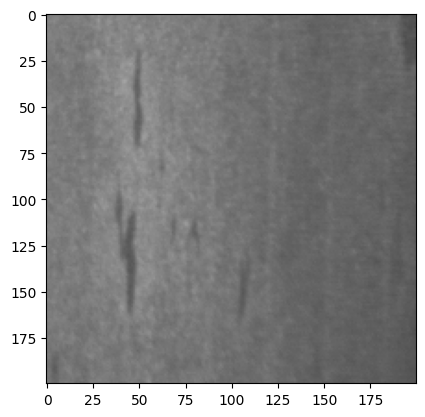

1/1 [==============================] - 0s 32ms/step
[[0. 0. 0. 1. 0. 0.]]
It's not Inclusion


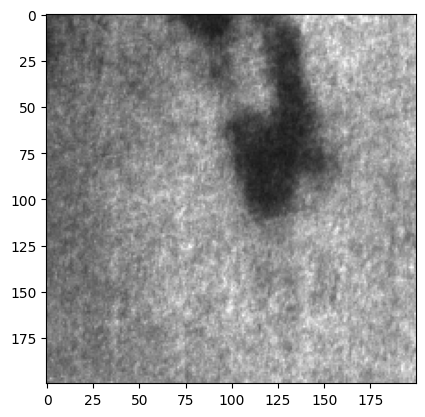

1/1 [==============================] - 0s 47ms/step
[[1. 0. 0. 0. 0. 0.]]
It's Patches


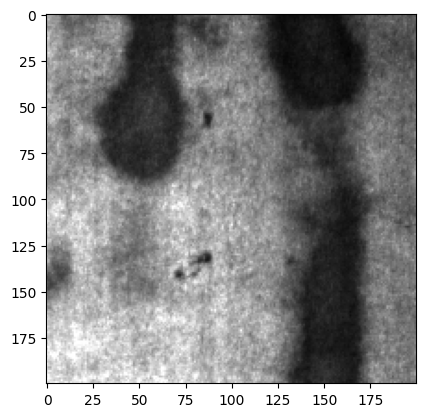

1/1 [==============================] - 0s 44ms/step
[[1. 0. 0. 0. 0. 0.]]
It's Patches


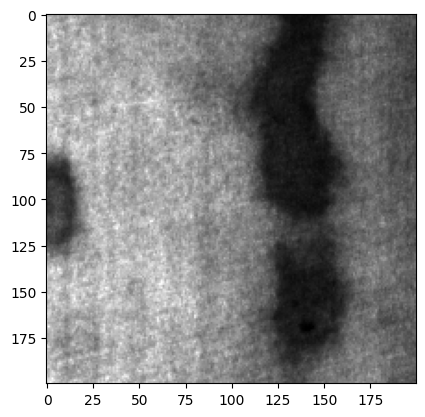

1/1 [==============================] - 0s 45ms/step
[[1. 0. 0. 0. 0. 0.]]
It's Patches


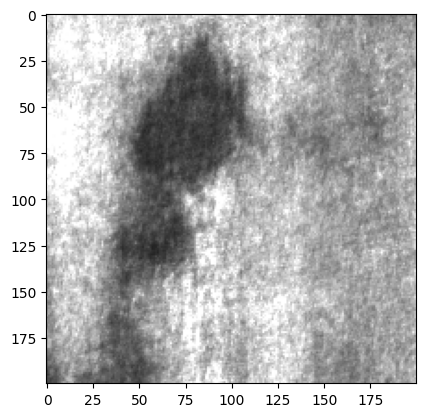

1/1 [==============================] - 0s 43ms/step
[[1. 0. 0. 0. 0. 0.]]
It's Patches


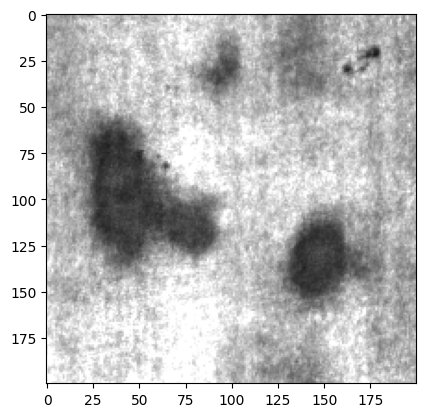

1/1 [==============================] - 0s 50ms/step
[[1. 0. 0. 0. 0. 0.]]
It's Patches


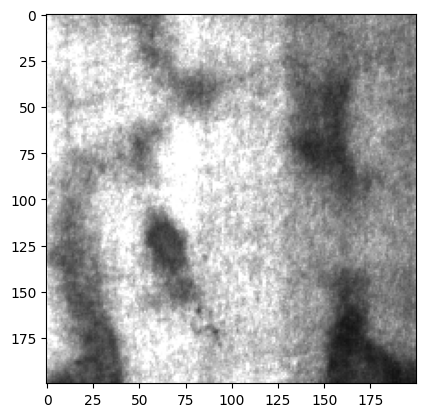

1/1 [==============================] - 0s 52ms/step
[[1. 0. 0. 0. 0. 0.]]
It's Patches


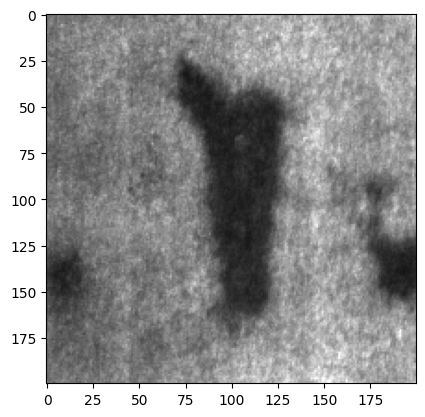

1/1 [==============================] - 0s 44ms/step
[[1. 0. 0. 0. 0. 0.]]
It's Patches


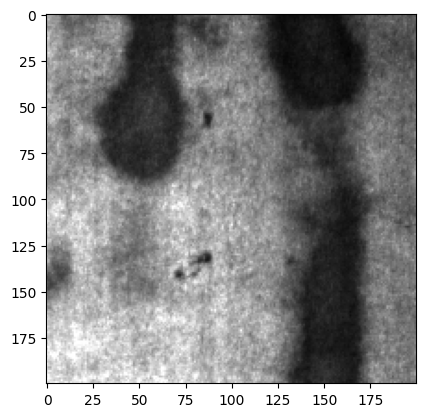

1/1 [==============================] - 0s 40ms/step
[[1. 0. 0. 0. 0. 0.]]
It's Patches


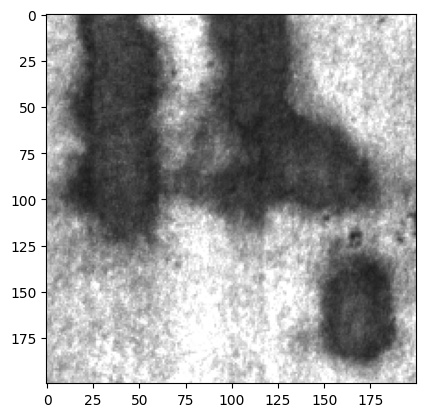

1/1 [==============================] - 0s 55ms/step
[[1. 0. 0. 0. 0. 0.]]
It's Patches


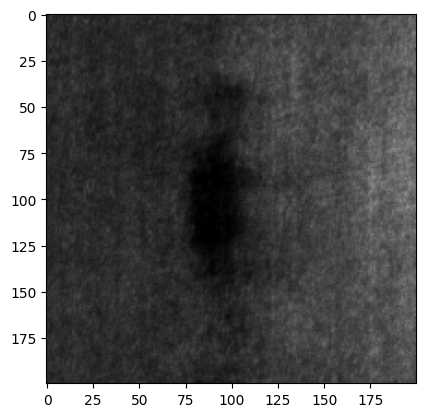

1/1 [==============================] - 0s 48ms/step
[[1. 0. 0. 0. 0. 0.]]
It's Patches


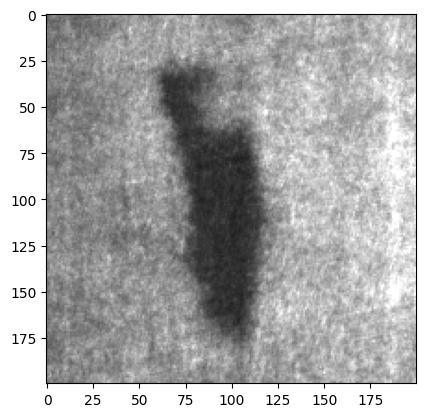

1/1 [==============================] - 0s 71ms/step
[[1. 0. 0. 0. 0. 0.]]
It's Patches


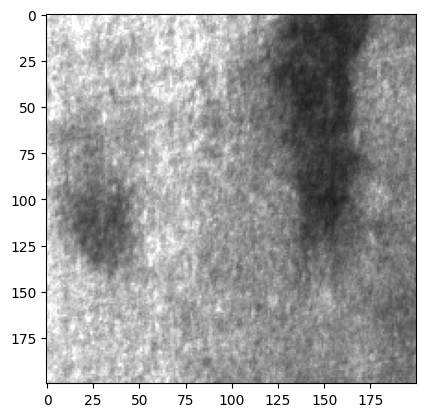

1/1 [==============================] - 0s 74ms/step
[[1. 0. 0. 0. 0. 0.]]
It's Patches


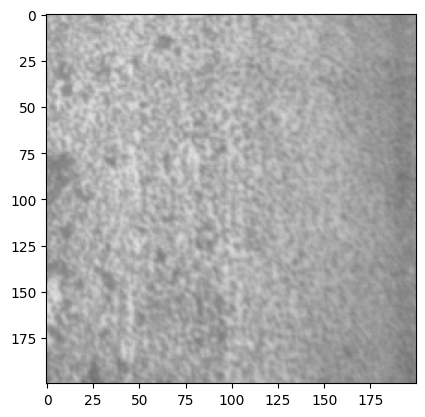

1/1 [==============================] - 0s 78ms/step
[[1. 0. 0. 0. 0. 0.]]
It's Pitted


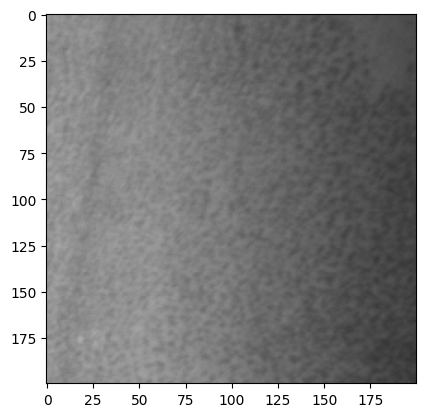

1/1 [==============================] - 0s 84ms/step
[[0. 0. 0. 1. 0. 0.]]
It's not Pitted


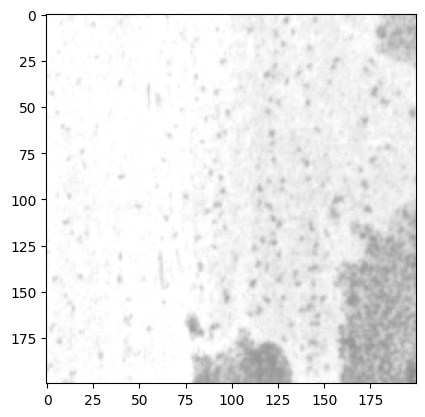

1/1 [==============================] - 0s 94ms/step
[[0. 0. 0. 1. 0. 0.]]
It's not Pitted


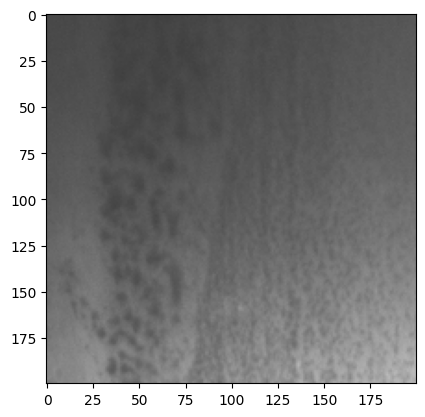

1/1 [==============================] - 0s 65ms/step
[[0. 0. 0. 1. 0. 0.]]
It's not Pitted


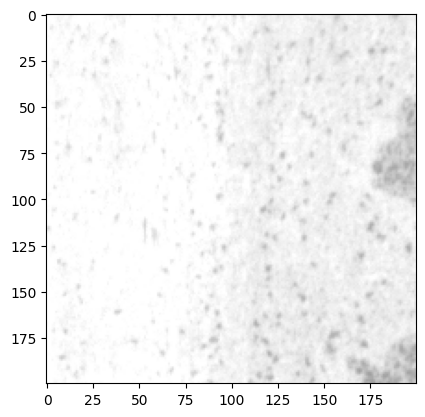

1/1 [==============================] - 0s 66ms/step
[[0. 0. 0. 1. 0. 0.]]
It's not Pitted


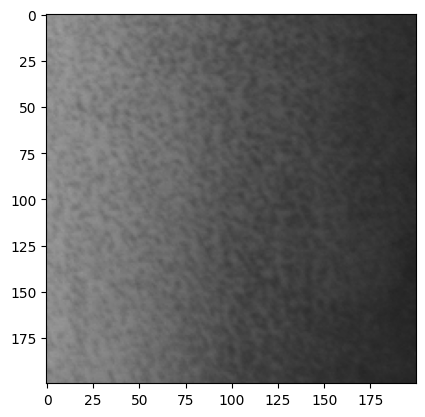

1/1 [==============================] - 0s 73ms/step
[[0. 0. 0. 1. 0. 0.]]
It's not Pitted


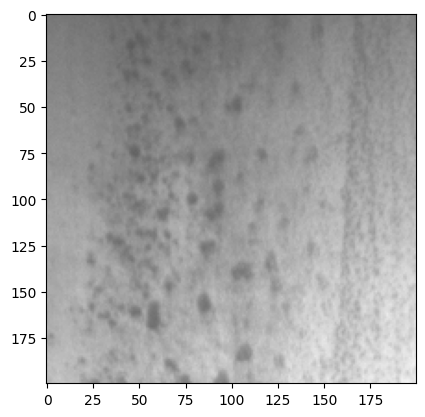

1/1 [==============================] - 0s 55ms/step
[[0. 0. 0. 1. 0. 0.]]
It's not Pitted


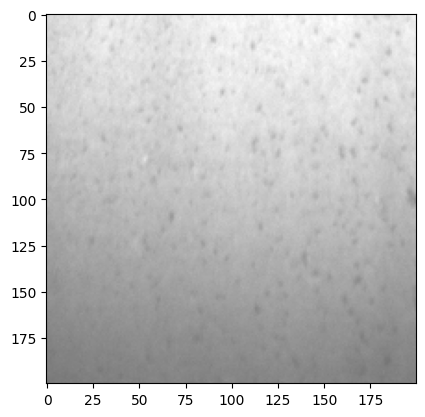

1/1 [==============================] - 0s 69ms/step
[[0. 0. 0. 1. 0. 0.]]
It's not Pitted


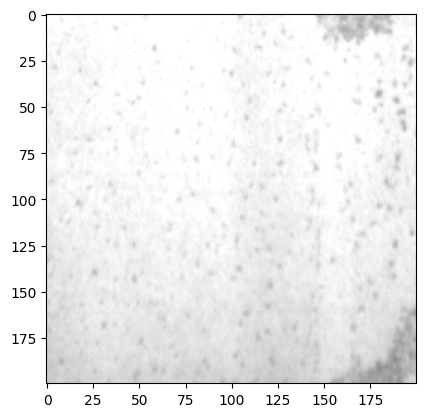

1/1 [==============================] - 0s 52ms/step
[[0. 0. 0. 1. 0. 0.]]
It's not Pitted


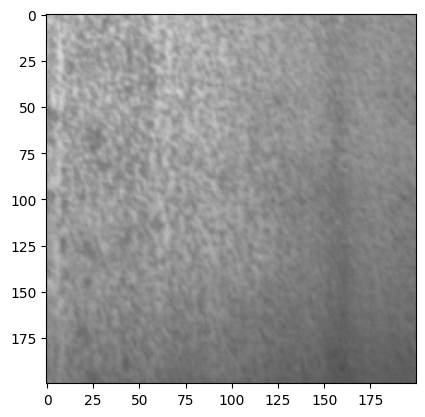

1/1 [==============================] - 0s 61ms/step
[[0. 0. 0. 1. 0. 0.]]
It's not Pitted


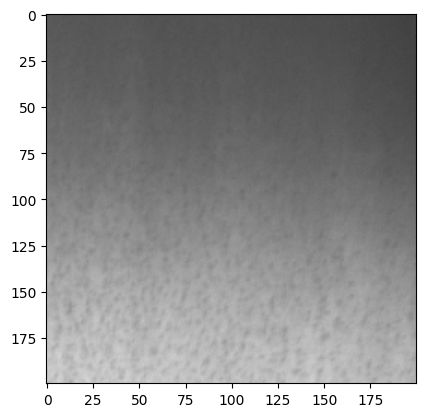

1/1 [==============================] - 0s 64ms/step
[[0. 0. 0. 1. 0. 0.]]
It's not Pitted


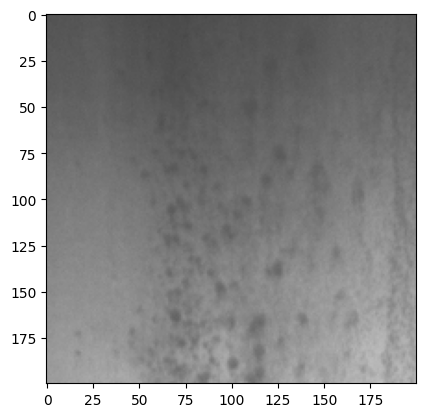

1/1 [==============================] - 0s 55ms/step
[[0. 0. 0. 1. 0. 0.]]
It's not Pitted


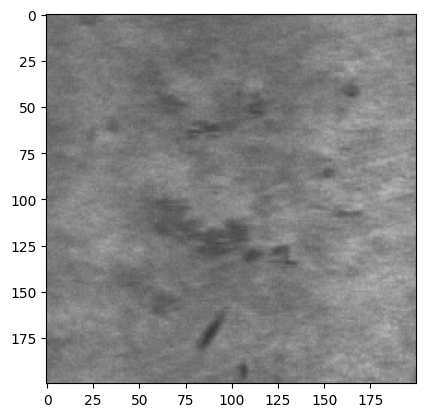

1/1 [==============================] - 0s 48ms/step
[[9.9998915e-01 0.0000000e+00 0.0000000e+00 1.0833448e-05 0.0000000e+00
  0.0000000e+00]]
It's Rolled


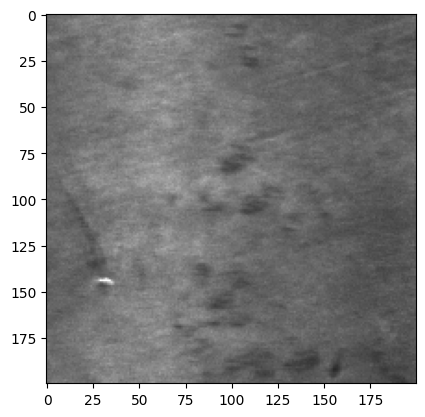

1/1 [==============================] - 0s 72ms/step
[[1. 0. 0. 0. 0. 0.]]
It's Rolled


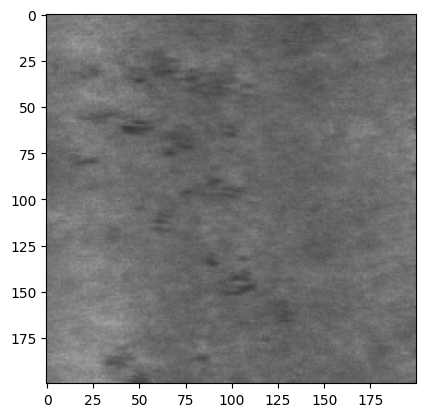

1/1 [==============================] - 0s 50ms/step
[[0.9973349  0.         0.         0.00266504 0.         0.        ]]
It's Rolled


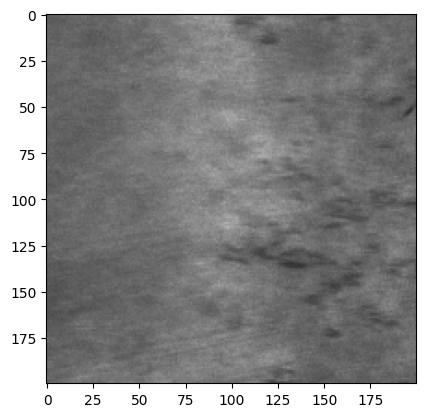

1/1 [==============================] - 0s 50ms/step
[[1.0000000e+00 0.0000000e+00 0.0000000e+00 1.3372848e-16 0.0000000e+00
  0.0000000e+00]]
It's Rolled


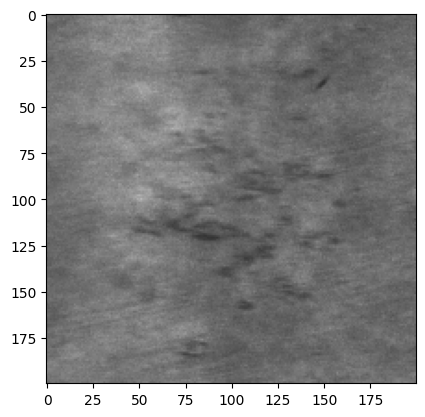

1/1 [==============================] - 0s 57ms/step
[[1.000000e+00 0.000000e+00 0.000000e+00 3.259006e-17 0.000000e+00
  0.000000e+00]]
It's Rolled


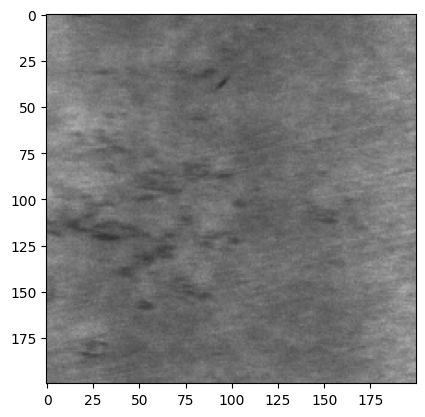

1/1 [==============================] - 0s 56ms/step
[[1. 0. 0. 0. 0. 0.]]
It's Rolled


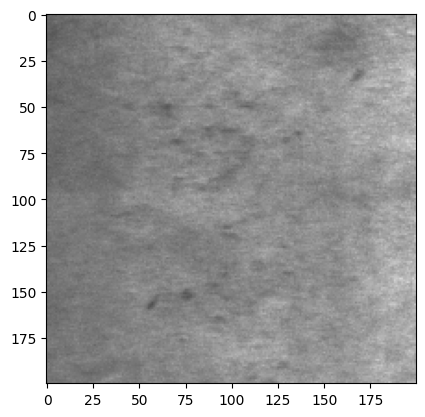

1/1 [==============================] - 0s 80ms/step
[[0. 0. 0. 1. 0. 0.]]
It's not Rolled


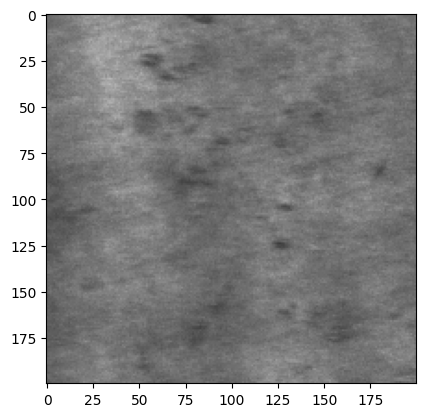

1/1 [==============================] - 0s 50ms/step
[[1. 0. 0. 0. 0. 0.]]
It's Rolled


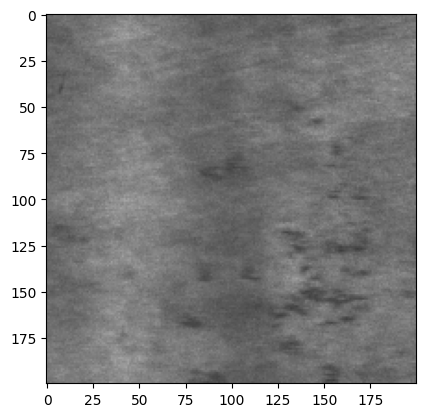

1/1 [==============================] - 0s 53ms/step
[[1. 0. 0. 0. 0. 0.]]
It's Rolled


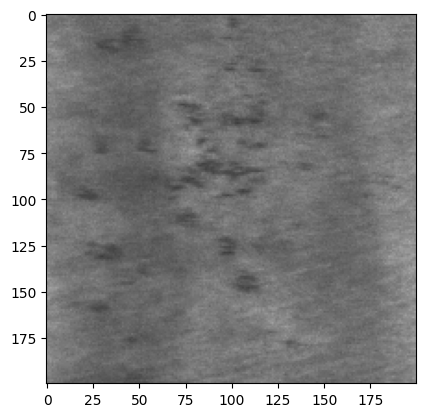

1/1 [==============================] - 0s 49ms/step
[[1. 0. 0. 0. 0. 0.]]
It's Rolled


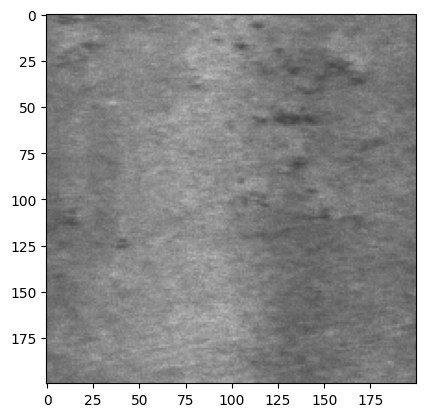

1/1 [==============================] - 0s 81ms/step
[[1. 0. 0. 0. 0. 0.]]
It's Rolled


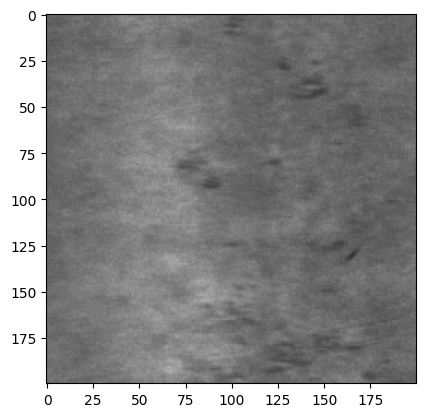

1/1 [==============================] - 0s 57ms/step
[[0. 0. 0. 1. 0. 0.]]
It's not Rolled


In [18]:
#This is to check for all the distortions in the test dataset
for i in range(0,5):
  dir_path = "/content/NEU_Metal_Surface_Defects_Data/NEU Metal Surface Defects Data/test/{problem}".format( problem = defect_dict[i])

  for j in os.listdir(dir_path):
    img = image.load_img(dir_path + "/" + j, target_size = (200,200))
    plt.imshow(img)
    plt.show()

    X = image.img_to_array(img)
    X = np.expand_dims(X, axis = 0)

    images = np.vstack([X])
    val = model.predict(images)
    print(val)
    if np.argmax(val) == 0:  # Assuming class 'Scratches' is represented by index 5
          print("It's {problem}".format(problem = defect_dict[i] ))
    else:
          print("It's not {problem}".format(problem = defect_dict[i] ))